<a href="https://colab.research.google.com/github/ChaesongYun/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 샘플 이미지셋 실습
- MNIST: 손글씨 이미지셋(60000, 28, 28)
- CIFAR10: 10가지 분류 사물 이미지셋(50000, 32, 32)

In [20]:
import tensorflow as tf

In [21]:
(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()
print(mnist_x.shape, mnist_y.shape)

(cifar_x, cifar_y), _ = tf.keras.datasets.cifar10.load_data()
print(cifar_x.shape, cifar_y.shape)

(60000, 28, 28) (60000,)
(50000, 32, 32, 3) (50000, 1)


## 1. 화면 출력

[5 0 4 1 9 2 1 3 1 4]


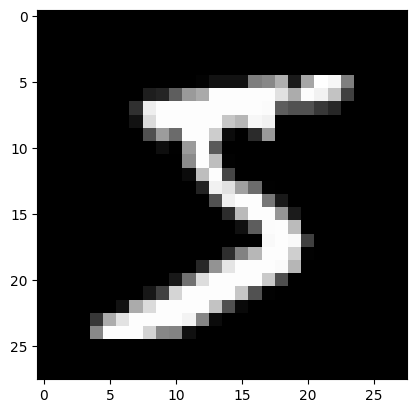

In [22]:
import matplotlib.pyplot as plt

print(mnist_y[0:10])
plt.imshow(mnist_x[0], cmap='gray')

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


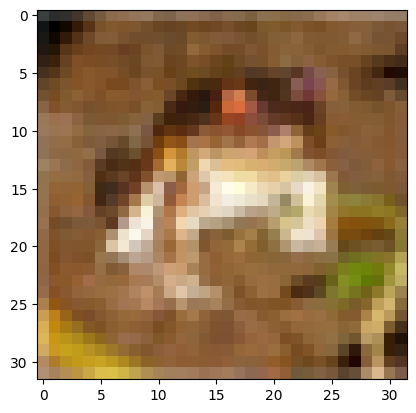

In [23]:
# 그림이 어떤 종류인지?
# cifar10 dataset 치면 나오는데
# 6번은 frog
# 그러니까 cifar_x는 독립변수, cifar_y는 종속변수
# cifar_x라는 값이 주어졌을 때 어떤 그림인지 판별하여 결과를 낸 것이 cifar_y

print(cifar_y[:10])

plt.imshow(cifar_x[0])

## 2. 차원 확인

In [24]:
import numpy as np

d1 = np.array([1, 2, 3, 4, 5])
print(d1.shape)

d2 = np.array([d1, d1, d1, d1])
print(d2.shape)

d3 = np.array([d2, d2, d2])
print(d3.shape)

d4 = np.array([d3, d3])
print(d4.shape)

(5,)
(4, 5)
(3, 4, 5)
(2, 3, 4, 5)


In [25]:
print(mnist_y.shape)
print(cifar_y.shape)

(60000,)
(50000, 1)


In [26]:
x1 = np.array([1, 2, 3, 4 ,5])
print(x1.shape)
print(mnist_y[0:5])
print(mnist_y[0:5].shape)

(5,)
[5 0 4 1 9]
(5,)


In [27]:
x2 = np.array([[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5]])
print(x2.shape)

(3, 5)


In [28]:
x3 = np.array([[1], [2], [3], [4], [5]])
print(x3.shape)
print(cifar_y[:5])
print(cifar_y[:5].shape)

(5, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]
(5, 1)


## Flatten Layer를 활용한 이미지 실습
<br>

## keras의 model
- 딥러닝 모형은 일종의 함수<br>
  특정한 입력값을 받아서 여러 층의 레이어를 거친 후에 출력값을 생성한다
- 모형을 생성하기 위해서는 입력으로부터 출력까지 레이어를 단계별로 연결해주면 된다
<br>
<br>

### model의 입력층, Input
- Model은 입력과 출력을 결정하면 내부 로직에 의해 관련된 레이어들을 모두 수집하여 관리한다

```py
from tensorflow.keras.layers import Dense

hidden_layer = Dense(3, activation='relu', name='hidden')
output_layer = Dense(1, activation='sigmoid', name='output')

from tensorflow.keras.layers import Input
inputs = Input((2,))

hidden = hidden_layer(inputs)
output = output_layer(hidden)
```
- Input은 입력 텐서라는 특수한 텐서를 만들어주는 함수이다
- 다른 레이어와 다르게 레이어 인스턴스를 반환하는 것이 아니라 입력 텐서를 반환
- tf.placeholder의 역할

<br>
<br>

## 모델 선언하기
```py
from tensorflow.keras.models import Model

model = Model(inputs, ouput)
model.summary()
```

## with reshape

In [29]:
# 데이터를 준비하고

import pandas as pd

# (mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()
mnist_x = mnist_x.reshape(60000, 784)

# get_dummies: 수치형 데이터로만 변환을 하게 되면 서로 간의 관계성이 생긴다
# 월요일을 1, 화요일을 2, 수요일을 3이라고 단순하게 수치형 데이터로 변환하게 되면
# 해당 데이터들 간 1+2=3이라는 관계성이 존재하게 됨
# 하지만 실제 데이터인 월요일, 화요일, 수요일 간에는 그러한 관계성이 없다..
# -> 사실이 아닌 관계성으로 인해 잘못된 학습이 일어날 수 있다
# => 서로 무관한 수, 즉 ㅈ더미로 만든 가변수로 변환함으로써 그런 문제를 해결한다
mnist_y = pd.get_dummies(mnist_y)
print(mnist_x.shape, mnist_y.shape)


(60000, 784) (60000, 10)


### hidden_layer
- tf.keras.layers.Dense
- 첫번째 인자: 출력 뉴련의 수
- input_dim: 입력 뉴런의 수
- kernal_initializer: 가중치를 초기화하는 방법(uniform: 균일분포, normal: 가우시안 분포)
- activation: 활성화 함수
  - linear: 디폴트값으로 입력값과 가중치로 계산된 결과값이 그대로 출력으로 나온다
  - sigmoid: 이진분류에서 출력층에 주로 쓰인다
  - softmax: 다중클래스 분류문제에서 출력층에 주로 쓰인다
  - relu: Rectified Linear Unit함수로 은닉층에 주로 쓰인다
  - swish: relu를 대체하기 위해 구글이 고안한 함수<br>
    시그모이드 함수에 X를 곱한 아주 간단한 형태이지만 깊은 레이어를 학습시킬 때 relu보다 더 뛰어난 성능을 보인다

### .compile()
- 모델을 학습시키기 전에 compile()함수를 사용하여 모델의 손실함수(loss), 최적화방법(optimizer), 평가지표(metrics)를 설정
- 주요인자
  - optimizer: 최적화 방법을 설정, 경사 하강법 등 다양한 최적화 알고리즘 존재
  - loss: 손실함수를 설정, 모델이 예측한 값과 실제 값 사이의 차이를 계산
  - metrics: 평가 지표를 설정, 학습 중 모델의 성능을 평가할 때 사용
<br>
<br>

#### optimizer
- SGD: 확률적 경사 하강법, 가장 기본적인 최적화 알고리즘
- RMSprop: RMS(Root Mean Square)값을 이용하여 최적화하는 알고리즘
- Adagrad: 학습률을 개별 매개변수에 적응적으로 조정하는 방식의 최적화 알고리즘
- Adadelta: Adagrad의 학습률 감소 버전, 학습률이 지속적으로 감소하며 학습률 조정에 대한 hyperparameter를 더욱 간단하게 설정할 수 있음
- Adam: 학습률을 자동으로 조정하는 알고리즘, 현재 가장 많이 사용
<br>
<br>

#### loss
- 모델의 예측값과 실제값의 차이를 계산
- 이 차이가 작을 수록 좋은 성능을 보인다
- 회귀문제: mean_squared_error
- 분류문제: categorical_crossentropy, binary_crossentropy 등이 사용
<br>
<br>

#### metrics
- 모델의 성능을 평가할 때
- 회귀문제: mse
- 분류문제: accuracy, precision, recall, f1-score
<br>
<br>

#### loss_weights
- 손실함수에 대한 가중치를 설정
- 다중 손실 함수 모델에서 사용


In [30]:
# 모델을 만든다

X = tf.keras.layers.Input(shape=[784])
# hidden layer 쌓기
H = tf.keras.layers.Dense(84, activation='swish')(X)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

### .fit()
- 입력데이터와 정답데이터를 모델에 입력하여 모델의 가중치(weight)를 업데이트 한다
- 매개변수
  - x: 모델의 입력데이터를 나타내는 numpy배열 혹은 numpy배열의 리스트
  - y: 모델의 정답데이터를 나타내는 numpy배열 혹은 numpy배열의 리스트
  - batch_size: 한번에 처리되는 샘플의 수를 나타내는 정수값. 기본값은 32
  - epochs: 모델이 학습할 총 횟수를 나타내는 정수값. 기본값은 1
  - verbose: 학습과정을 어떻게 출력할 것인지를 결정하는 값. <br>0, 1, 2 중 하나의 값을 가질 수 있으며, 0일 경우 출력이 없고, 1일 경우 진행막대(progress bar)가 표시되고 2일 경우 에포크마다 한줄씩 출력.기본값은 1
  - validation_data: 검증용 데이터를 나타내는 튜플<br>
    (x_val, y_val)형태로 입력하며 기본값은 None이다
  - callbacks: 훈련 중에 호출되는 콜백함수의 리스트를 지정하는 인수<br>
    콜백함수는 훈련 중간에 모델의 상태를 확인하거나 모델의 가중치를 저장하는 등의 역할을 수행
  - shuffle: 샘플을 학습할 때마다 데이터를 무작위로 섞을지 여부를 결정하는 값. 기본값은 True
  

In [32]:
# 모델을 학습한다
model.fit(mnist_x, mnist_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4537 - accuracy: 0.8534
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5266 - accuracy: 0.9161
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4273 - accuracy: 0.9309
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3860 - accuracy: 0.9391
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3636 - accuracy: 0.9427
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3452 - accuracy: 0.9471
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3258 - accuracy: 0.9504
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3291 - accuracy: 0.9530
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3085 - accuracy: 0.9544
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.291

In [37]:
# 모델을 이용
pred = model.predict(mnist_x[:5])
pd.DataFrame(pred).round(1)

1/1 [==============================] - 0s 29ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
mnist_y[:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


## with flatten


In [40]:
# 데이터를 준비하고

import pandas as pd

(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()

mnist_y = pd.get_dummies(mnist_y)
print(mnist_x.shape, mnist_y.shape)


(60000, 28, 28) (60000, 10)


In [41]:
# 모델을 만든다

X = tf.keras.layers.Input(shape=[28, 28])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [42]:
# 모델을 학습하고
model.fit(mnist_x, mnist_y, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1791 - accuracy: 0.8476
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5122 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4439 - accuracy: 0.9296
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3832 - accuracy: 0.9388
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3658 - accuracy: 0.9434
